# 04GenderCOVID19-V5

# Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from IPython.display import display

from scipy import stats #the only import you actually need for this

# Loading Data

In [2]:
gender = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\gender.csv",
    index_col=False,
    skipinitialspace=True,
)

# Size

In [3]:
gender.shape

(242, 5)

# Missing Data

In [4]:
gender.isna().sum()

date         0
time         0
sex          0
confirmed    0
deceased     0
dtype: int64

# Delete Unneeded Columns

In [5]:
gender = gender.drop(["time"], axis=1)

## Rename Columns

In [6]:
gender.rename(
    columns={
        "date": "Date",
        "sex": "Gender",
        "confirmed": "Confirmed",
        "deceased": "Deceased",
    },
    inplace=True,
)

## Rename Column Values

In [7]:
gender.replace('male', 'Male', inplace = True)
gender.replace('female', 'Female', inplace = True)

# Dataset

In [8]:
gender.head()

,Date,Gender,Confirmed,Deceased
0,3/2/2020,Male,1591,13
1,3/2/2020,Female,2621,9
2,3/3/2020,Male,1810,16
3,3/3/2020,Female,3002,12
4,3/4/2020,Male,1996,20


In [9]:
pd.set_option("max_rows", None)
pd.set_option("max_columns", None)

# Males Confirmed

In [33]:
males_confirmed = gender.loc[(gender['Gender'] == 'Male')]

In [34]:
males_confirmed_copy = males_confirmed.copy()
males_confirmed = males_confirmed_copy

In [35]:
males_confirmed["Count"] = males_confirmed["Confirmed"].diff().fillna(0)

In [37]:
males_confirmed["Count"].mean()

32.264462809917354

# Females Confirmed

In [81]:
females_confirmed = gender.loc[(gender['Gender'] == 'Female')]

In [82]:
females_confirmed_copy = females_confirmed.copy()
females_confirmed = females_confirmed_copy

In [83]:
females_confirmed["Confirmed Count"] = females_confirmed["Confirmed"].diff().fillna(0)

In [84]:
females_confirmed["Confirmed Count"].mean()

38.710743801652896

In [85]:
females_confirmed.head()

,Date,Gender,Confirmed,Deceased,Confirmed Count
1,3/2/2020,Female,2621,9,0.0
3,3/3/2020,Female,3002,12,381.0
5,3/4/2020,Female,3332,12,330.0
7,3/5/2020,Female,3617,14,285.0
9,3/6/2020,Female,3939,17,322.0


# Method 2

In [86]:
females = gender.loc[(gender['Gender'] == 'Female')]

In [87]:
females_copy = females.copy()
females = females_copy

In [88]:
females["Confirmed Count"] = females["Confirmed"].diff().fillna(0)

In [89]:
females["Deceased Count"] = females["Deceased"].diff().fillna(0)

In [90]:
females

,Date,Gender,Confirmed,Deceased,Confirmed Count,Deceased Count
1,3/2/2020,Female,2621,9,0.0,0.0
3,3/3/2020,Female,3002,12,381.0,3.0
5,3/4/2020,Female,3332,12,330.0,0.0
7,3/5/2020,Female,3617,14,285.0,2.0
9,3/6/2020,Female,3939,17,322.0,3.0
11,3/7/2020,Female,4245,18,306.0,1.0
13,3/8/2020,Female,4440,20,195.0,2.0
15,3/9/2020,Female,4583,20,143.0,0.0
17,3/10/2020,Female,4661,21,78.0,1.0
19,3/11/2020,Female,4808,25,147.0,4.0


In [84]:
females_confirmed["Confirmed Count"].mean()

38.710743801652896

In [85]:
females_confirmed.head()

,Date,Gender,Confirmed,Deceased,Confirmed Count
1,3/2/2020,Female,2621,9,0.0
3,3/3/2020,Female,3002,12,381.0
5,3/4/2020,Female,3332,12,330.0
7,3/5/2020,Female,3617,14,285.0
9,3/6/2020,Female,3939,17,322.0


# Confirmed Swarm Plot

In [79]:
concat_confirmed = pd.concat(
    [males_confirmed, females_confirmed],
    axis=1,
    keys=["males_confirmed", "females_confirmed"],
).stack(0)
concat_confirmed = concat_confirmed.reset_index(level=1)

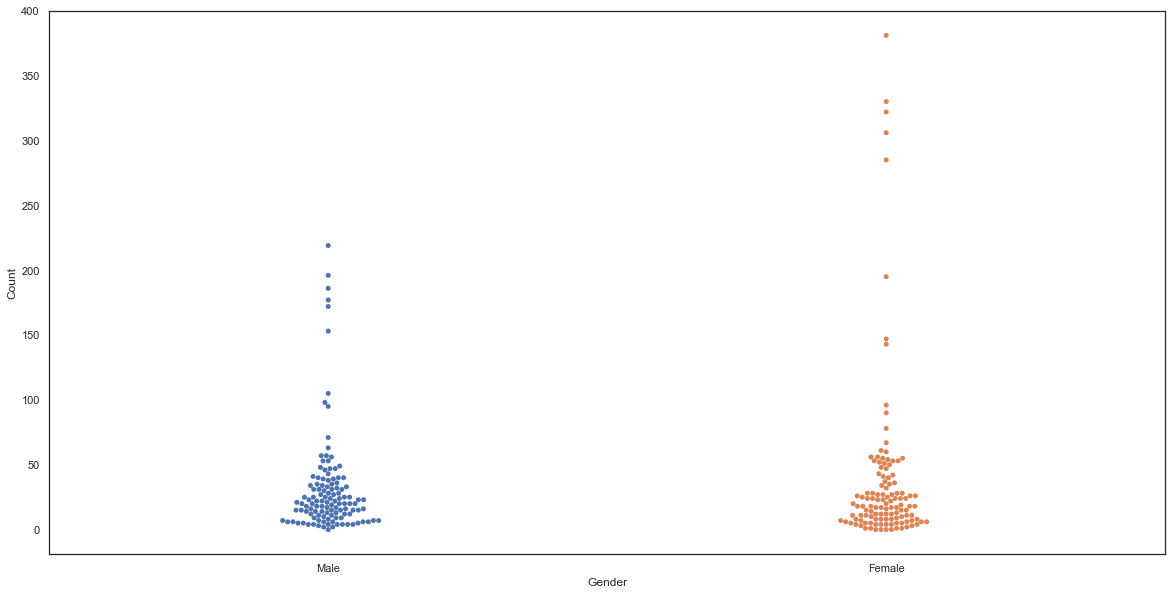

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))

ax = sns.swarmplot(x='Gender', y='Count', data=concat_confirmed)

# Males Deceased

In [38]:
males_deceased = gender.loc[(gender['Gender'] == 'Male')]

In [39]:
males_deceased_copy = males_deceased.copy()
males_deceased = males_deceased_copy

In [40]:
males_deceased["Count"] = males_deceased["Deceased"].diff().fillna(0)

In [41]:
males_deceased["Count"].mean()

1.140495867768595

# Females Deceased

In [46]:
females_deceased = gender.loc[(gender['Gender'] == 'Female')]

In [47]:
females_deceased_copy = females_deceased.copy()
females_deceased = females_deceased_copy

In [48]:
females_deceased["Count"] = females_deceased["Deceased"].diff().fillna(0)

In [49]:
females_deceased["Count"].mean()

1.0082644628099173

# Confirmed Statistical Significance Test

In [50]:
male_confirmed_list = males_confirmed['Confirmed'].tolist()

In [51]:
female_confirmed_list = females_confirmed['Confirmed'].tolist()

In [52]:
stats.mannwhitneyu(male_confirmed_list, female_confirmed_list)

MannwhitneyuResult(statistic=909.5, pvalue=5.365238470322022e-32)

In [53]:
stats.shapiro(male_confirmed_list)

ShapiroResult(statistic=0.925539493560791, pvalue=4.721199729829095e-06)

In [54]:
stats.shapiro(female_confirmed_list)

ShapiroResult(statistic=0.8379620313644409, pvalue=3.363124501110093e-10)

In [98]:
stats.ttest_ind(male_confirmed_list,female_confirmed_list)

Ttest_indResult(statistic=-17.481890764228474, pvalue=1.0831493925030637e-44)

# Deceased Statistical Significance Test

In [55]:
male_deceased_list = males_deceased['Deceased'].tolist()

In [56]:
female_deceased_list = females_deceased['Deceased'].tolist()

In [57]:
stats.mannwhitneyu(male_deceased_list, female_deceased_list)

MannwhitneyuResult(statistic=9792.0, pvalue=5.632173501992387e-06)

In [58]:
stats.shapiro(male_deceased_list)

ShapiroResult(statistic=0.8193866014480591, pvalue=7.011080604968356e-11)

In [59]:
stats.shapiro(female_deceased_list)

ShapiroResult(statistic=0.7780519723892212, pvalue=3.0440921051227976e-12)

In [60]:
stats.ttest_ind(male_deceased_list,female_deceased_list)

Ttest_indResult(statistic=2.3746446029926154, pvalue=0.018353025610579034)

# Function

In [61]:
def test_sig(x, y):
    if stats.shapiro(x).pvalue >= 0.05 and stats.shapiro(y).pvalue >= 0.05: #if they are normally distriuted
        print("t-test")
        return stats.ttest_ind(x,y)
    else:
        print("mann-whitney")
        return stats.mannwhitneyu(x, y)

In [62]:
test_sig(male_deceased_list, female_deceased_list)

mann-whitney


MannwhitneyuResult(statistic=9792.0, pvalue=5.632173501992387e-06)

In [63]:
test_sig(male_confirmed_list, female_confirmed_list)

mann-whitney


MannwhitneyuResult(statistic=909.5, pvalue=5.365238470322022e-32)